###Plotting Functions Below

In [48]:
def colorMap(vector):
    norm=cm.colors.Normalize(vmin=-200, vmax=600) #CAUTION! Range of Random Matrix must be within these values!
    cmap = cm.jet
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    return m.to_rgba(vector)

def plotClusters(clusters, centers):
    fig = plt.figure(figsize=(20,10)) #adjust scale
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    map(lambda i: plt.scatter(clusters[i][0][0], clusters[i][0][1],\
                       color=colorMap(clusters[i][1][1])), range(len(clusters)))
    map(lambda i: plt.scatter(centers[i][0], centers[i][1], \
                        color="gray"), range(len(centers)))
    plt.show()
    print("These are the found centers, colored in gray: " , centers)
    
def dataOutput(PointsImmutable, clusters, centers):
    plotClusters(clusters, centers)
    #prettyPrint(clusters)                #List Point-Clusters

##$k$-Center Greedy Algorithm Begins Below

In [49]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import numpy as np
import random
import copy
from __future__ import print_function
%matplotlib inline

def kCenters(k, points):
    centers=[]
    random.shuffle(points) #Taking first random center
    centers.append(points.pop()) #Point removed so we don't loop between the two farthest points
    k-=1 
    
    while k>0: 
        k-=1
        centers.append(retFarthestPoint(centers[-1], points))
    return centers

def randomArr2d(upper, lower, n): 
    return np.round((np.random.rand(n,2)*(upper-lower))+lower)

def twoDNorm(point1,point2): #Unused
    norm = math.sqrt(sum(map(lambda x1,x2: (x1-x2)**2, point1[:2], point2[:2]))) #Distance Formula 2d
    return norm

def retFarthestPoint(point1,points):
    distances=map(lambda point2: twoDNorm(point1,point2), points)
    return points.pop(distances.index(max(distances)))

def retClosestPoint(point1,points):
    distances=map(lambda point2: twoDNorm(point1,point2), points)
    return points[distances.index(min(distances))]

def clusterization(Points, centers):
#Now we just need to find out, for each point, who is the closest cluster center that they should join.
    return map(lambda point: [point, retClosestPoint(point, centers)] , Points)

def prettyPrint(clusters):
    print("       Point                          Member of Cluster")
    print("----------------------------------------------------")
    map(lambda i: print( "%s                 %s"  % (clusters[i][0], clusters[i][1])), range(len(clusters)))

def main(k=2, PointsImmutable=randomArr2d(10,0,50).tolist()):
    Points=copy.deepcopy(PointsImmutable) #MutableCopy
    centers=kCenters(k,Points) 
    clusters=clusterization(PointsImmutable,centers)
    dataOutput(PointsImmutable, clusters, centers)
    #return clusters

### There seems to be some sort of optimal value for $k$.

##Solving the same problem Many Times

In [50]:
x1=randomArr2d(100,-100,50).tolist() #immutablePointSet
x2=randomArr2d(300,100,50).tolist() #immutablePointSet
x3=randomArr2d(600,400,50).tolist() #immutablePointSet
x4=randomArr2d(500,200,50).tolist() 
PointsImmutable= x1+x2+x3+x4

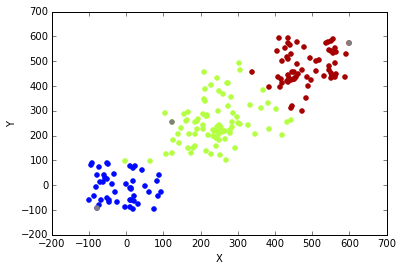

These are the found centers, colored in gray:  [[124.0, 256.0], [600.0, 574.0], [-79.0, -93.0]]


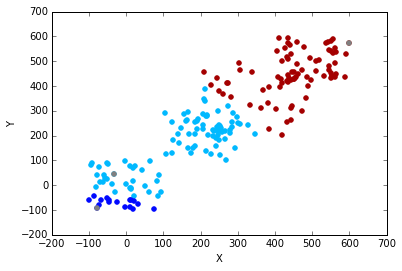

These are the found centers, colored in gray:  [[-34.0, 46.0], [600.0, 574.0], [-79.0, -93.0]]


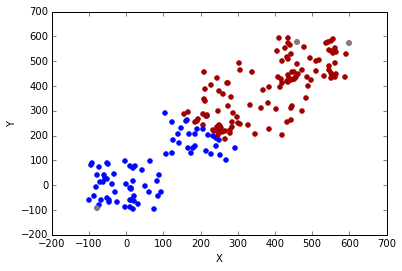

These are the found centers, colored in gray:  [[458.0, 576.0], [-79.0, -93.0], [600.0, 574.0]]


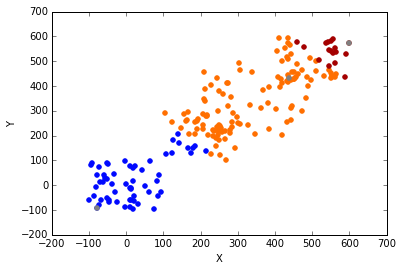

These are the found centers, colored in gray:  [[438.0, 433.0], [-79.0, -93.0], [600.0, 574.0]]


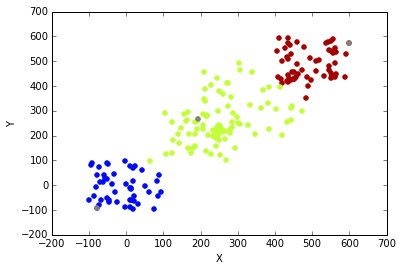

These are the found centers, colored in gray:  [[192.0, 268.0], [600.0, 574.0], [-79.0, -93.0]]


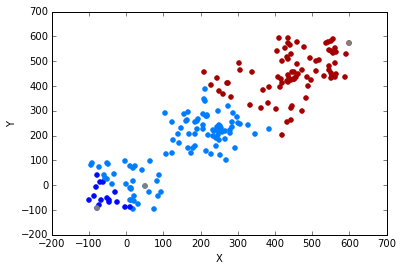

These are the found centers, colored in gray:  [[51.0, -3.0], [600.0, 574.0], [-79.0, -93.0]]


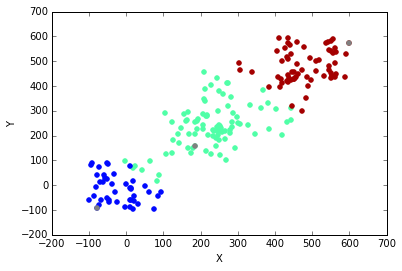

These are the found centers, colored in gray:  [[186.0, 159.0], [600.0, 574.0], [-79.0, -93.0]]


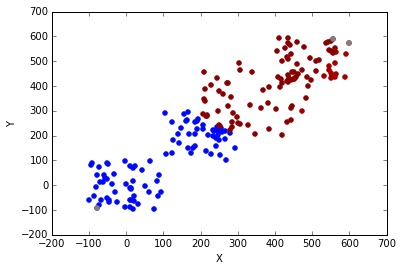

These are the found centers, colored in gray:  [[555.0, 591.0], [-79.0, -93.0], [600.0, 574.0]]


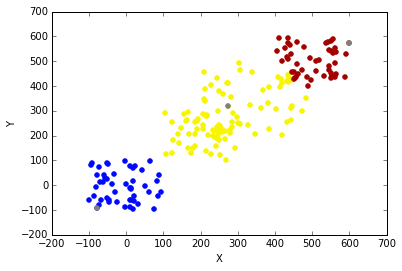

These are the found centers, colored in gray:  [[273.0, 319.0], [-79.0, -93.0], [600.0, 574.0]]


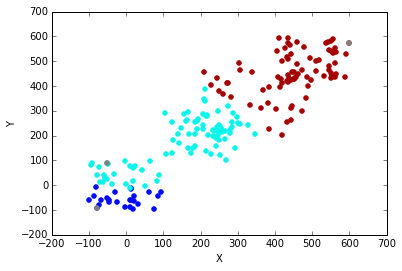

These are the found centers, colored in gray:  [[-51.0, 91.0], [600.0, 574.0], [-79.0, -93.0]]


[None, None, None, None, None, None, None, None, None, None]

In [51]:
map(lambda i: main(3, PointsImmutable), range(10)) #Trying to find different centers using the same dataset.